# Optimisation

The textbook often contains notation like

$$ \min_x f(x) $$

How do we solve these problems in Python? We use `scipy.optimize.minimize`.

In [1]:
from scipy.optimize import minimize
import numpy

Let's try a one-dimensional example first: $f(x) = 2x^2 + 3x + 2$

In [2]:
def f(x):
    return 2*x**2 + 3*x + 2

In [3]:
xx = numpy.linspace(-2, 2)

In [4]:
yy = f(xx)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

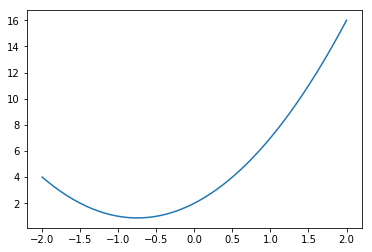

In [6]:
plt.plot(xx, yy)

We see the minimum lies between -1 and -0.5, so let's guess -0.5

In [7]:
result = minimize(f, -0.5)
result

      fun: 0.8749999999999998
 hess_inv: array([[1]])
      jac: array([  2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([-0.75])

The return value is an object. The value of x at which the minimum was found is in the `x` property. The function value is in the `fun` property.

In [8]:
print("Minimum lies at x =", result.x)
print("minimum function value: f(x) = ", result.fun)

Minimum lies at x = [-0.75]
minimum function value: f(x) =  0.8749999999999998


In [9]:
minimize?

Let's say we have constraints on $x$:

$$ \min_x f(x), -0.5 \leq x \leq 1$$

In [10]:
minimize(f, 0.5, bounds=[[-0.5, 1]])

      fun: array([ 1.])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.00000004])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 4
      nit: 1
   status: 0
  success: True
        x: array([-0.5])

Now let's try a two-dimensional example:

$$ \min_{x, y} 2x^2 + 3y^2 + x + 2$$

In [11]:
def f2(x):
    return 2*x[0]**2 + 3*x[1]**2 + x[0] + 2

What does this look like? We can quickly generate values for the two dimensions using `meshgrid`

In [12]:
x, y = numpy.meshgrid(numpy.arange(3), numpy.arange(0, 30, 10))

In [13]:
x + y

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

In [14]:
xx2d, yy2d = numpy.meshgrid(xx, xx)

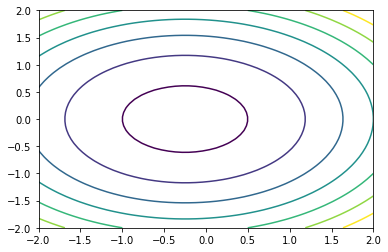

In [15]:
plt.contour(xx2d, yy2d, f2([xx2d, yy2d]))

In [16]:
minimize(f2, [1, 1])

      fun: 1.8750000000000004
 hess_inv: array([[  2.50000002e-01,  -1.79099489e-09],
       [ -1.79099489e-09,   1.66666665e-01]])
      jac: array([ -1.49011612e-08,   0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ -2.50000009e-01,  -7.14132758e-09])

As expected, we find x=-0.25 and y=0

Now let's constrain the problem:

In [17]:
minimize(f2, [1, 1], bounds=[[0.5, 1.5], [0.5, 1.5]])

      fun: 3.75
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.00000003,  3.00000007])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
   status: 0
  success: True
        x: array([ 0.5,  0.5])